# Build a song recommender system

In [1]:
import turicreate

# Load some music data

In [2]:
song_data = turicreate.SFrame('song_data.sframe/')

# Explore our data

In [3]:
song_data

user_id,song_id,listen_count,title,artist
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOAKIMP12A8C130995,1,The Cove,Jack Johnson
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Paco De Lucia
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOBXHDL12A81C204C0,1,Stronger,Kanye West
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOBYHAJ12A6701BF1D,1,Constellations,Jack Johnson
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SODACBL12A8C13C273,1,Learn To Fly,Foo Fighters
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SODDNQT12A6D4F5F7E,5,Apuesta Por El Rock 'N'Roll ...,Héroes del Silencio
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SODXRTY12AB0180F3B,1,Paper Gangsta,Lady GaGa
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOFGUAY12AB017B0A8,1,Stacked Actors,Foo Fighters
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOFRQTD12A81C233C0,1,Sehr kosmisch,Harmonia
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOHQWYZ12A6D4FA701,1,Heaven's gonna burn youreyes ...,Thievery Corporationfeat. Emiliana Torrini ...


## Show the most popular songs in the dataset

In [4]:
song_data['song'].show()

Materializing SArray

# Count the number of unique users in the data

In [5]:
users = song_data['user_id'].unique()

In [6]:
len(users)

66346

# Create a song recommender

In [7]:
train_data,test_data = song_data.random_split(.8,seed=0)

## Create a very simple popularity recommender

In [8]:
popularity_model = turicreate.popularity_recommender.create(train_data,
                                                           user_id = 'user_id',
                                                           item_id = 'song')

Warning: Ignoring columns song_id, listen_count, title, artist;

To use one of these as a rating column, specify the column name to be used as target

and use a method that allows the use of a target.

Preparing data set.

Data has 893580 observations with 66085 users and 9952 items.

Data prepared in: 0.42141s

893580 observations to process; with 9952 unique items.

## Use the popularity model to make some predictions

In [9]:
popularity_model.recommend(users=[users[0]])

user_id,song,score,rank
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Sehr kosmisch - Harmonia,4754.0,1
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Undo - Björk,4227.0,2
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,You're The One - DwightYoakam ...,3781.0,3
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Dog Days Are Over (RadioEdit) - Florence + The ...,3633.0,4
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Revelry - Kings Of Leon,3527.0,5
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Horn Concerto No. 4 in Eflat K495: II. Romance ...,3161.0,6
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Secrets - OneRepublic,3148.0,7
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Hey_ Soul Sister - Train,2538.0,8
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Fireflies - CharttraxxKaraoke ...,2532.0,9
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Tive Sim - Cartola,2521.0,10


In [10]:
popularity_model.recommend(users=[users[1]])

user_id,song,score,rank
696787172dd3f5169dc94deef97e427cee86147d ...,Sehr kosmisch - Harmonia,4754.0,1
696787172dd3f5169dc94deef97e427cee86147d ...,Undo - Björk,4227.0,2
696787172dd3f5169dc94deef97e427cee86147d ...,You're The One - DwightYoakam ...,3781.0,3
696787172dd3f5169dc94deef97e427cee86147d ...,Dog Days Are Over (RadioEdit) - Florence + The ...,3633.0,4
696787172dd3f5169dc94deef97e427cee86147d ...,Revelry - Kings Of Leon,3527.0,5
696787172dd3f5169dc94deef97e427cee86147d ...,Horn Concerto No. 4 in Eflat K495: II. Romance ...,3161.0,6
696787172dd3f5169dc94deef97e427cee86147d ...,Secrets - OneRepublic,3148.0,7
696787172dd3f5169dc94deef97e427cee86147d ...,Hey_ Soul Sister - Train,2538.0,8
696787172dd3f5169dc94deef97e427cee86147d ...,Fireflies - CharttraxxKaraoke ...,2532.0,9
696787172dd3f5169dc94deef97e427cee86147d ...,Tive Sim - Cartola,2521.0,10


# Build a recommender with personalization

In [11]:
personalized_model = turicreate.item_similarity_recommender.create(train_data,
                                                                  user_id = 'user_id',
                                                                  item_id = 'song')

Warning: Ignoring columns song_id, listen_count, title, artist;

To use one of these as a rating column, specify the column name to be used as target

and use a method that allows the use of a target.

Preparing data set.

Data has 893580 observations with 66085 users and 9952 items.

Data prepared in: 0.431005s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 1.899ms                        | 1.5        |

| 12.976ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 172.193ms                           | 0                | 0               |

| 372.815ms                           | 100              | 9952            |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 1.4063s

## Apply personalized model to make song recommendations

In [12]:
personalized_model.recommend(users=[users[0]])

user_id,song,score,rank
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Riot In Cell Block NumberNine - Dr Feelgood ...,0.03749999403953552,1
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Sei Lá Mangueira -Elizeth Cardoso ...,0.03316326439380646,2
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,The Stallion - Ween,0.032258063554763794,3
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Rain - Subhumans,0.031415924429893494,4
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,West One (Shine On Me) -The Ruts ...,0.030677199363708496,5
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Back Against The Wall -Cage The Elephant ...,0.030120477080345154,6
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Life Less Frightening -Rise Against ...,0.0284431129693985,7
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,A Beggar On A Beach OfGold - Mike And The ...,0.023002490401268005,8
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Audience Of One - RiseAgainst ...,0.01939384639263153,9
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Blame It On The Boogie -The Jacksons ...,0.018987342715263367,10


In [13]:
personalized_model.recommend(users=[users[1]])

user_id,song,score,rank
696787172dd3f5169dc94deef97e427cee86147d ...,Senza Una Donna (WithoutA Woman) - Zucchero / ...,0.01702657767704555,1
696787172dd3f5169dc94deef97e427cee86147d ...,Oceanside - Angels OfLight & Akron/Family ...,0.016382698501859392,2
696787172dd3f5169dc94deef97e427cee86147d ...,Bolinha De Papel - JoãoGilberto ...,0.013928570917674474,3
696787172dd3f5169dc94deef97e427cee86147d ...,La Fokin Moda - Calle 13,0.013313463756016322,4
696787172dd3f5169dc94deef97e427cee86147d ...,Wendy Clear - Blink-182,0.012755100216184343,5
696787172dd3f5169dc94deef97e427cee86147d ...,Sin Coro - Calle 13,0.011813687426703317,6
696787172dd3f5169dc94deef97e427cee86147d ...,Sin Exagerar - Calle 13Featuring Tego Calderón ...,0.011438054697854179,7
696787172dd3f5169dc94deef97e427cee86147d ...,Un Beso de Desayuno -Calle 13 ...,0.011053928307124547,8
696787172dd3f5169dc94deef97e427cee86147d ...,No Hay Nadie Como Tú -Calle 13 Featuring Café ...,0.010828912258148193,9
696787172dd3f5169dc94deef97e427cee86147d ...,La Tripleta - Calle 13,0.010348715952464513,10


# Apply model to find similar songs in the data set

In [14]:
personalized_model.get_similar_items(['With Or Without You - U2'])

song,similar,score,rank
With Or Without You - U2,I Still Haven't FoundWhat I'm Looking For ...,0.04285717010498047,1
With Or Without You - U2,Hold Me_ Thrill Me_ KissMe_ Kill Me - U2 ...,0.033734917640686035,2
With Or Without You - U2,Window In The Skies - U2,0.03283584117889404,3
With Or Without You - U2,Vertigo - U2,0.03007519245147705,4
With Or Without You - U2,Sunday Bloody Sunday - U2,0.02713179588317871,5
With Or Without You - U2,Bad - U2,0.02517986297607422,6
With Or Without You - U2,A Day Without Me - U2,0.023715436458587646,7
With Or Without You - U2,Another Time AnotherPlace - U2 ...,0.020325183868408203,8
With Or Without You - U2,Walk On - U2,0.020202040672302246,9
With Or Without You - U2,Get On Your Boots - U2,0.019685029983520508,10


In [15]:
personalized_model.get_similar_items(['Chan Chan (Live) - Buena Vista Social Club'])

song,similar,score,rank
Chan Chan (Live) - BuenaVista Social Club ...,Murmullo - Buena VistaSocial Club ...,0.1881188154220581,1
Chan Chan (Live) - BuenaVista Social Club ...,La Bayamesa - Buena VistaSocial Club ...,0.1871921420097351,2
Chan Chan (Live) - BuenaVista Social Club ...,Amor de Loca Juventud -Buena Vista Social Club ...,0.18483412265777588,3
Chan Chan (Live) - BuenaVista Social Club ...,Diferente - Gotan Project,0.021459221839904785,4
Chan Chan (Live) - BuenaVista Social Club ...,Mistica - Orishas,0.020576119422912598,5
Chan Chan (Live) - BuenaVista Social Club ...,Hotel California - GipsyKings ...,0.019304990768432617,6
Chan Chan (Live) - BuenaVista Social Club ...,Nací Orishas - Orishas,0.019157111644744873,7
Chan Chan (Live) - BuenaVista Social Club ...,Gitana - Willie Colon,0.018796980381011963,8
Chan Chan (Live) - BuenaVista Social Club ...,Le Moulin - Yann Tiersen,0.018796980381011963,9
Chan Chan (Live) - BuenaVista Social Club ...,Criminal - Gotan Project,0.018779337406158447,10


# Compare the models quantitatively
We now formally compare the popularity and the personalized models using precision-recall curves. 

In [17]:
%matplotlib inline
model_performance = turicreate.recommender.util.compare_models(test_data, 
                                                               [popularity_model, personalized_model], 
                                                               user_sample=.05)

compare_models: using 2931 users to estimate model performance
PROGRESS: Evaluate model M0


recommendations finished on 1000/2931 queries. users per second: 48000.8

recommendations finished on 2000/2931 queries. users per second: 55332.7


Precision and recall summary statistics by cutoff


+--------+----------------------+----------------------+
| cutoff |    mean_precision    |     mean_recall      |
+--------+----------------------+----------------------+
|   1    | 0.021494370522006166 | 0.006302644813391994 |
|   2    | 0.019106107130672137 | 0.010955167505832804 |
|   3    | 0.019333560786989702 | 0.015422354854289359 |
|   4    | 0.018935516888433975 | 0.020169235215294637 |
|   5    | 0.01787785738655751  | 0.024181133700069215 |
|   6    | 0.01757079495052883  | 0.02843788097114608  |
|   7    | 0.01705902422381445  | 0.03271838632486476  |
|   8    | 0.01646195837598088  | 0.035486982261321444 |
|   9    | 0.01626293642670312  | 0.039412084036986254 |
|   10   | 0.015557830092118783 | 0.042169971927934494 |
+--------+----------------------+----------------------+
[10 rows x 3 columns]

PROGRESS: Evaluate model M1


recommendations finished on 1000/2931 queries. users per second: 47355.2

recommendations finished on 2000/2931 queries. users per second: 55111.6


Precision and recall summary statistics by cutoff
+--------+----------------------+-----------------------+
| cutoff |    mean_precision    |      mean_recall      |
+--------+----------------------+-----------------------+
|   1    | 0.018082565677243246 | 0.0062263914106288724 |
|   2    | 0.015011941316956668 |  0.009783730996627613 |
|   3    | 0.012851131581940184 |  0.012308064201615898 |
|   4    | 0.011600136472193786 |  0.01458760163980226  |
|   5    | 0.010986011600136453 |  0.01692454404839256  |
|   6    | 0.010349141362447405 |  0.018798049632235893 |
|   7    | 0.009504313496125157 |  0.019824413427279336 |
|   8    | 0.009126577959740706 |  0.02192833891912705  |
|   9    | 0.008756965768224708 |  0.023342637876926527 |
|   10   | 0.008256567724326171 |  0.024117448759209275 |
+--------+----------------------+-----------------------+
[10 rows x 3 columns]



The table shows that the personalized model provides much better performance.

In [28]:
import matplotlib.pyplot as plt

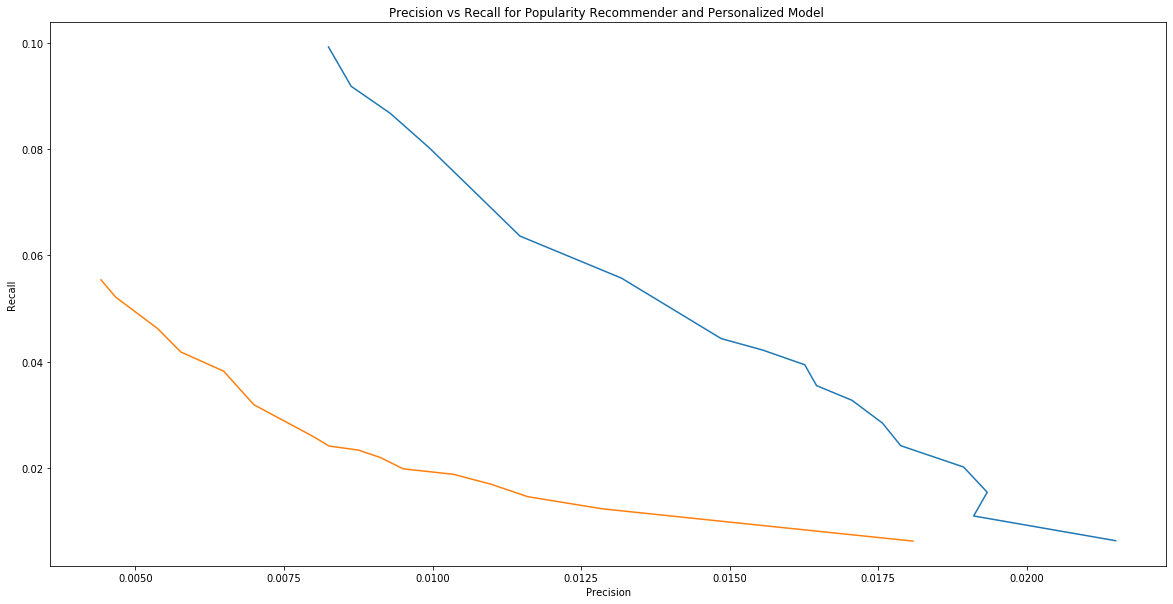

In [39]:
plt.figure(figsize=(20,10))
plt.plot(
    list(model_performance[0]["precision_recall_overall"]["precision"]),
    list(model_performance[0]["precision_recall_overall"]["recall"])
)
plt.plot(
    list(model_performance[1]["precision_recall_overall"]["precision"]),
    list(model_performance[1]["precision_recall_overall"]["recall"])
)
plt.title("Precision vs Recall for Popularity Recommender and Personalized Model ")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.show()

In [45]:
artists = ["Kanye West", "Foo Fighters", "Taylor Swift", "Lady GaGa"]
for artist in artists:
    temp = song_data[song_data['artist'] == artist]
    unique_users = len(temp['user_id'].unique())
    print("{} has {} unique users".format(artist, unique_users))

Kanye West has 2522 unique users
Foo Fighters has 2055 unique users
Taylor Swift has 3246 unique users
Lady GaGa has 2928 unique users


In [67]:
song_data[song_data["artist"] == "Kanye West"]

user_id,song_id,listen_count,title,artist
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOBXHDL12A81C204C0,1,Stronger,Kanye West
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOMLMKI12A81C204BC,1,Champion,Kanye West
5d5e0142e54c3bb7b69f548c2ee55066c90700eb ...,SORFASW12A81C22AE7,2,Stronger,Kanye West
537340ff896dea11328910013cfe759413e1eeb3 ...,SOBXHDL12A81C204C0,2,Stronger,Kanye West
7dd192c8bd4f27f573cb15e8656442aadd7a9c01 ...,SOOLPFK12A58A7BDE3,5,Flashing Lights,Kanye West
8fce200f3912e9608e3b1463cdb9c3529aab5c08 ...,SOBXHDL12A81C204C0,2,Stronger,Kanye West
8fce200f3912e9608e3b1463cdb9c3529aab5c08 ...,SOIBSWV12A6D4F6AB3,1,Through The Wire,Kanye West
a56bf59af6edc5ae6c92d61ddd214989332864e8 ...,SONGNHO12AB0183915,1,Bad News,Kanye West
8fa25e588aeedaa539674babb75729ac9f31f15e ...,SOOLPFK12A58A7BDE3,1,Flashing Lights,Kanye West
e8612acfb1572297ea0eaaa1f27927d55fdcec65 ...,SOIYWPZ12A81C204EF,2,Homecoming,Kanye West


In [68]:
most_popular = song_data.groupby(
    key_column_names="artist", 
    operations={"total_count": turicreate.aggregate.SUM("listen_count")}
)

In [75]:
most_popular.sort("total_count", ascending=True)

artist,total_count
William Tabbert,14
Reel Feelings,24
Beyoncé feat. Bun B andSlim Thug ...,26
Boggle Karaoke,30
Diplo,30
harvey summers,31
Nâdiya,36
Jody Bernal,38
Aneta Langerova,38
Kanye West / Talib Kweli/ Q-Tip / Common / ...,38


In [54]:
item_similarity_model = turicreate.item_similarity_recommender.create(
    train_data, user_id= "user_id", item_id= "song"
)

Warning: Ignoring columns song_id, listen_count, title, artist;

To use one of these as a rating column, specify the column name to be used as target

and use a method that allows the use of a target.

Preparing data set.

Data has 893580 observations with 66085 users and 9952 items.

Data prepared in: 0.39678s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 672us                          | 1.5        |

| 9.82ms                         | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 159.458ms                           | 0                | 0               |

| 343.62ms                            | 100              | 9952            |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 0.36889s

In [55]:
subset_test_users = test_data['user_id'].unique()[0:10000]

In [58]:
recommended_songs = item_similarity_model.recommend(subset_test_users,k=1)

recommendations finished on 1000/10000 queries. users per second: 43903.9

recommendations finished on 2000/10000 queries. users per second: 59678.3

recommendations finished on 3000/10000 queries. users per second: 68070.4

recommendations finished on 4000/10000 queries. users per second: 73351.4

recommendations finished on 5000/10000 queries. users per second: 76997.7

recommendations finished on 6000/10000 queries. users per second: 79472.3

recommendations finished on 7000/10000 queries. users per second: 81384.9

recommendations finished on 8000/10000 queries. users per second: 82880.1

recommendations finished on 9000/10000 queries. users per second: 84181.4

recommendations finished on 10000/10000 queries. users per second: 84127.6

In [61]:
recommended_songs

user_id,song,score,rank
696787172dd3f5169dc94deef97e427cee86147d ...,Senza Una Donna (WithoutA Woman) - Zucchero / ...,0.01702657767704555,1
2e9cbd200d67910aeb97b36efe9cd4341cc06030 ...,Secrets - OneRepublic,0.038436369101206465,1
18fafad477f9d72ff86f7d0bd838a6573de0f64a ...,Rabbit Heart (Raise ItUp) - Florence + The ...,0.07993997260928154,1
fe85b96ba1983219b296f6b4869dd29eb2b72ff9 ...,Secrets - OneRepublic,0.07888271411259969,1
95dc7e2b188b1148b2d25f4e6b6e94afacc4efc3 ...,Bust a Move - InfectedMushroom ...,0.05347385406494141,1
9bd4c3ace8717adbd277541d979af6acf6de54f6 ...,JUAN LOCO - Rodrigo yGabriela ...,0.025352112452189126,1
66515166dc465cb51af511db9f6e708095af31a6 ...,Fell On Black Days -Soundgarden ...,0.013208288699388504,1
181d9c254ff957a396b8bbcec10228f84cfa5c2c ...,Future Reflections - MGMT,0.054100479398454936,1
87fa091833add3a9b90404d4bae5d2cd709f632b ...,RoboCop - Kanye West,0.05411255359649658,1
3930e92959235c4adb586ffc8ed5429b9a304656 ...,Undo - Björk,0.03987368515559605,1


In [63]:
recommended_songs.groupby(
    key_column_names="song", 
    operations={"count": turicreate.aggregate.COUNT()}
)

song,count
Dumpweed - Blink-182,4
Guys Like Me - EricChurch ...,2
Nomenclature - AndrewBird ...,1
Ride A White Horse -Goldfrapp ...,1
Failure - Kings OfConvenience ...,3
Pitter-Pat - ErinMcCarley ...,1
Disposable Teens -Marilyn Manson ...,2
Everything Ends (AlbumVersion) - Slipknot ...,1
Washed By The Water(Album Version) - ...,3
The Special Two (AlbumVersion) - Missy Higgins ...,1
